In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns


In [2]:
uri_filmes = "https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv"
filmes = pd.read_csv(uri_filmes)

In [3]:
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
mapa = {
    "movieId":"filme_id",
    "title":"titulo",
    "genres":"generos"
}
filmes = filmes.rename(columns=mapa)
filmes.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
generos = filmes.generos.str.get_dummies()
generos.head()
dados_dos_filmes = pd.concat([filmes,generos],axis=1)
dados_dos_filmes.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
from sklearn.preprocessing  import StandardScaler

In [7]:
scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)
generos_escalados.shape

D:\Anaconda3\envs\aluraenv\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Anaconda3\envs\aluraenv\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


(9742, 20)

# K-Means

In [8]:
from sklearn.cluster import KMeans

In [9]:
modelo = KMeans(n_clusters=3)

modelo.fit(generos_escalados)

print(f"Grupos {modelo.labels_}")

Grupos [2 2 0 ... 0 2 0]


In [10]:
print(f"Grupos {modelo.cluster_centers_}")

Grupos [[ 0.04030772 -0.31751412 -0.21590944 -0.25227359 -0.27045122  0.25801706
  -0.17975763  0.14480917  0.20158146 -0.14848199 -0.07658311 -0.27663377
  -0.11336962  0.02875527 -0.18544487  0.22594932 -0.26100198 -0.47076514
   0.10025651  0.04209063]
 [-0.05917995  0.62380291  0.14079921 -0.2325662  -0.26780679 -0.57099333
   0.44695314 -0.21588483 -0.20331388  0.01723742  0.17780699  0.62174866
   0.15387243 -0.17743113  0.40007824 -0.34990123  0.46540808  1.05802301
  -0.14021594 -0.05505026]
 [-0.05917995 -0.033867    0.87595856  2.28314655  2.50629282  0.23080566
  -0.31671343 -0.20221857 -0.58987274  0.8548876  -0.09492563 -0.27777491
   0.20634864  0.38671671 -0.13317313 -0.27412553  0.12242791 -0.47256138
  -0.16934298 -0.08320228]]


In [11]:
grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)
grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.040308,-0.317514,-0.215909,-0.252274,-0.270451,0.258017,-0.179758,0.144809,0.201581,-0.148482,-0.076583,-0.276634,-0.113370,0.028755,-0.185445,0.225949,-0.261002,-0.470765,0.100257,0.042091
1,-0.059180,0.623803,0.140799,-0.232566,-0.267807,-0.570993,0.446953,-0.215885,-0.203314,0.017237,0.177807,0.621749,0.153872,-0.177431,0.400078,-0.349901,0.465408,1.058023,-0.140216,-0.055050
2,-0.059180,-0.033867,0.875959,2.283147,2.506293,0.230806,-0.316713,-0.202219,-0.589873,0.854888,-0.094926,-0.277775,0.206349,0.386717,-0.133173,-0.274126,0.122428,-0.472561,-0.169343,-0.083202


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F8E69BDC18>,
      dtype=object)

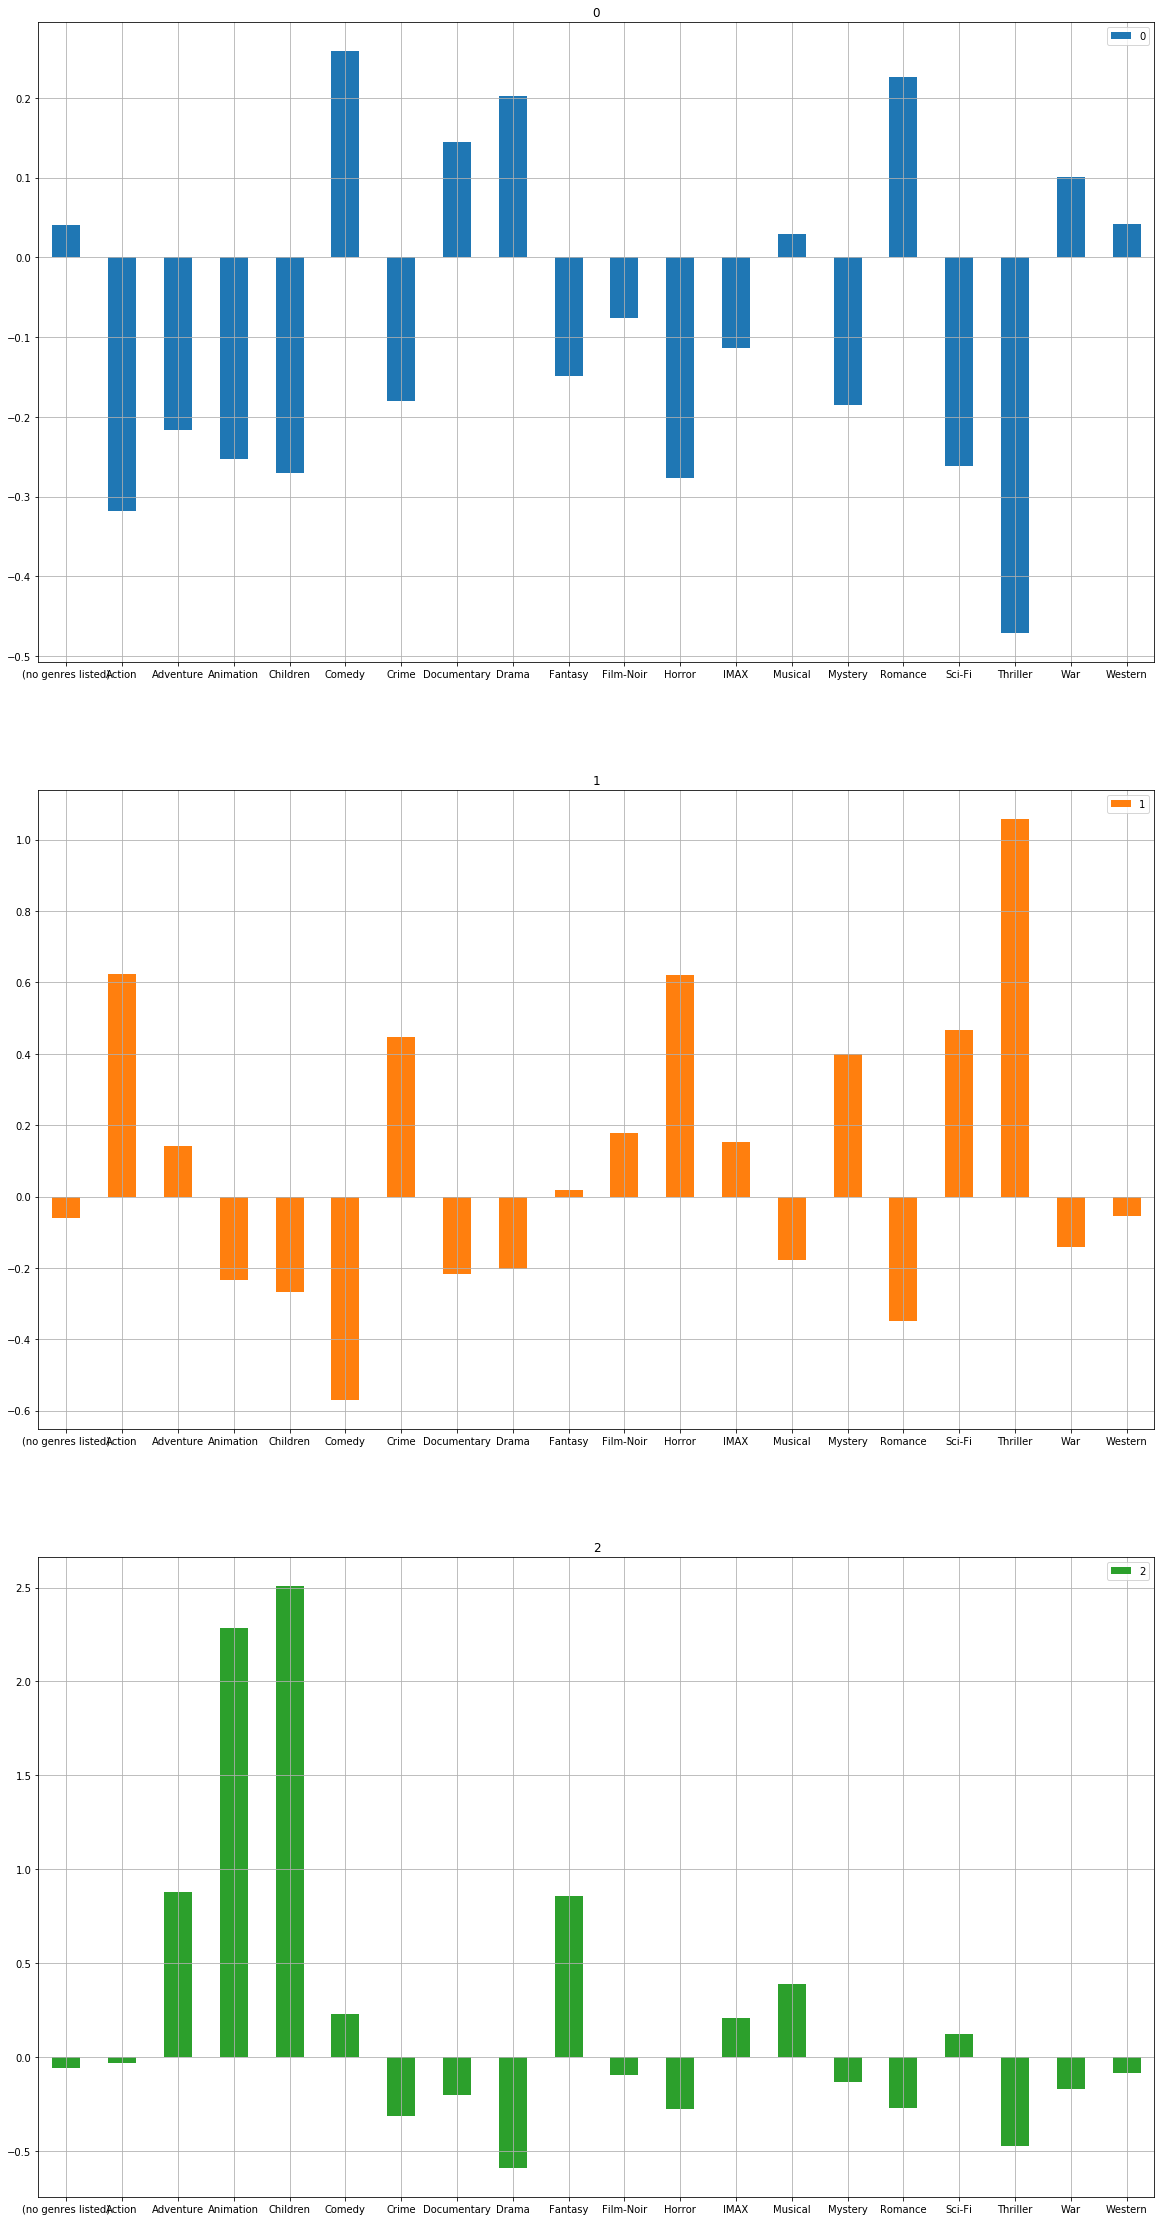

In [12]:
grupos.T.plot.bar(subplots=True, figsize=(20,40),sharex=False,grid=True,rot=0)



In [13]:
grupo = 0
filtro = modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
8617,118696,The Hobbit: The Battle of the Five Armies (2014),Adventure|Fantasy,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2415,3208,Loaded Weapon 1 (National Lampoon's Loaded Wea...,Action|Comedy,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2295,3042,Meatballs III (1987),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
739,963,"Inspector General, The (1949)",Musical,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2877,3846,Easy Money (1983),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4922,7379,The Alamo (2004),Drama|War|Western,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4760,7086,Pygmalion (1938),Comedy|Drama,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6578,55241,Mr. Woodcock (2007),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2548,3410,Soft Fruit (1999),Comedy|Drama,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5325,8844,Camera Buff (Amator) (1979),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
from sklearn.manifold import TSNE
import seaborn as sns

In [18]:
tsne = TSNE() #t-SNE - Técnica de redução de dimensionalidade útil para visualizações de datasets com muitas dimensões (20, no nosso caso)
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[-61.487503  , -34.330944  ],
       [-21.86767   , -18.58455   ],
       [  0.30227408, -18.084393  ],
       ...,
       [ 27.46512   ,  -3.1814523 ],
       [-39.11203   , -25.25219   ],
       [-15.594122  ,   4.894495  ]], dtype=float32)

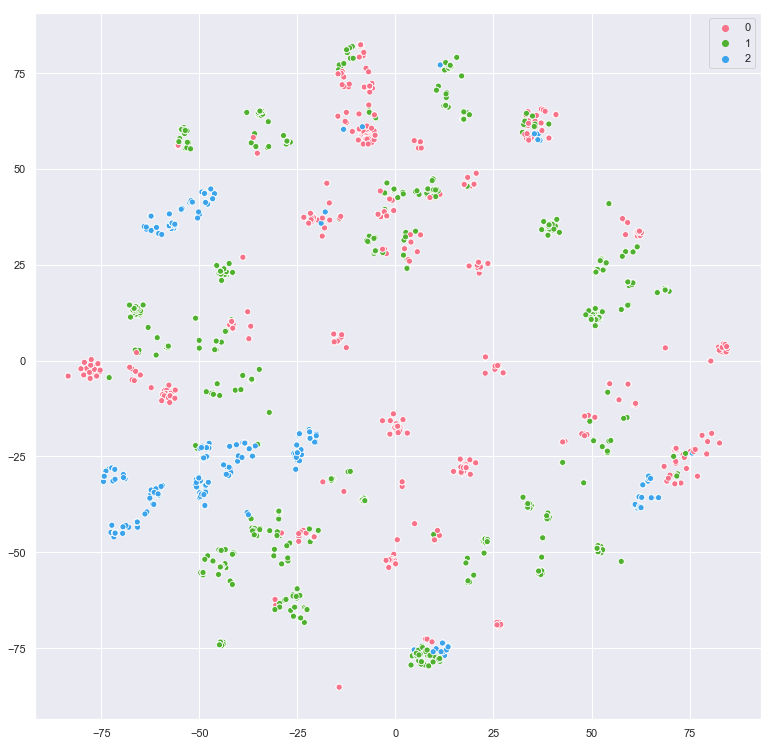

In [20]:
sns.set()
sns.set(rc={"figure.figsize":(13,13)})#tamanho da figura
sns.scatterplot(x=visualizacao[:,0], y=visualizacao[:,1],hue=modelo.labels_,palette=sns.color_palette('husl', 3))

In [21]:
modelo = KMeans(n_clusters=20)
modelo.fit(generos_escalados)
grupos = pd.DataFrame(modelo.cluster_centers_,columns=generos.columns)
grupos.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,0.157041,0.884557,3.865793,1.580717,0.149185,-0.279111,-0.217489,-0.647813,0.723310,-0.094926,-0.257479,-0.128397,-0.188419,-0.178853,-0.312629,0.270662,-0.464828,-0.180463,-0.132065
1,-0.059180,0.395098,-0.085898,-0.217924,-0.262609,-0.398270,-0.302444,-0.217489,-0.506780,-0.265665,-0.094926,0.836514,-0.128397,-0.188419,-0.249986,-0.373219,2.990120,0.427594,-0.202020,-0.132065
2,-0.059180,-0.367822,-0.299261,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,0.990829,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.039011,-0.202020,-0.132065
3,-0.059180,0.402104,0.034527,-0.200424,-0.259242,-0.467113,-0.297244,-0.190284,0.747226,-0.242736,-0.094926,-0.305855,-0.128397,-0.188419,-0.213968,-0.053385,-0.231129,-0.198602,4.950012,-0.132065
4,16.897616,-0.480607,-0.385949,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,-0.900247,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.202020,-0.132065


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F8E82C4438>,
      dtype=object)

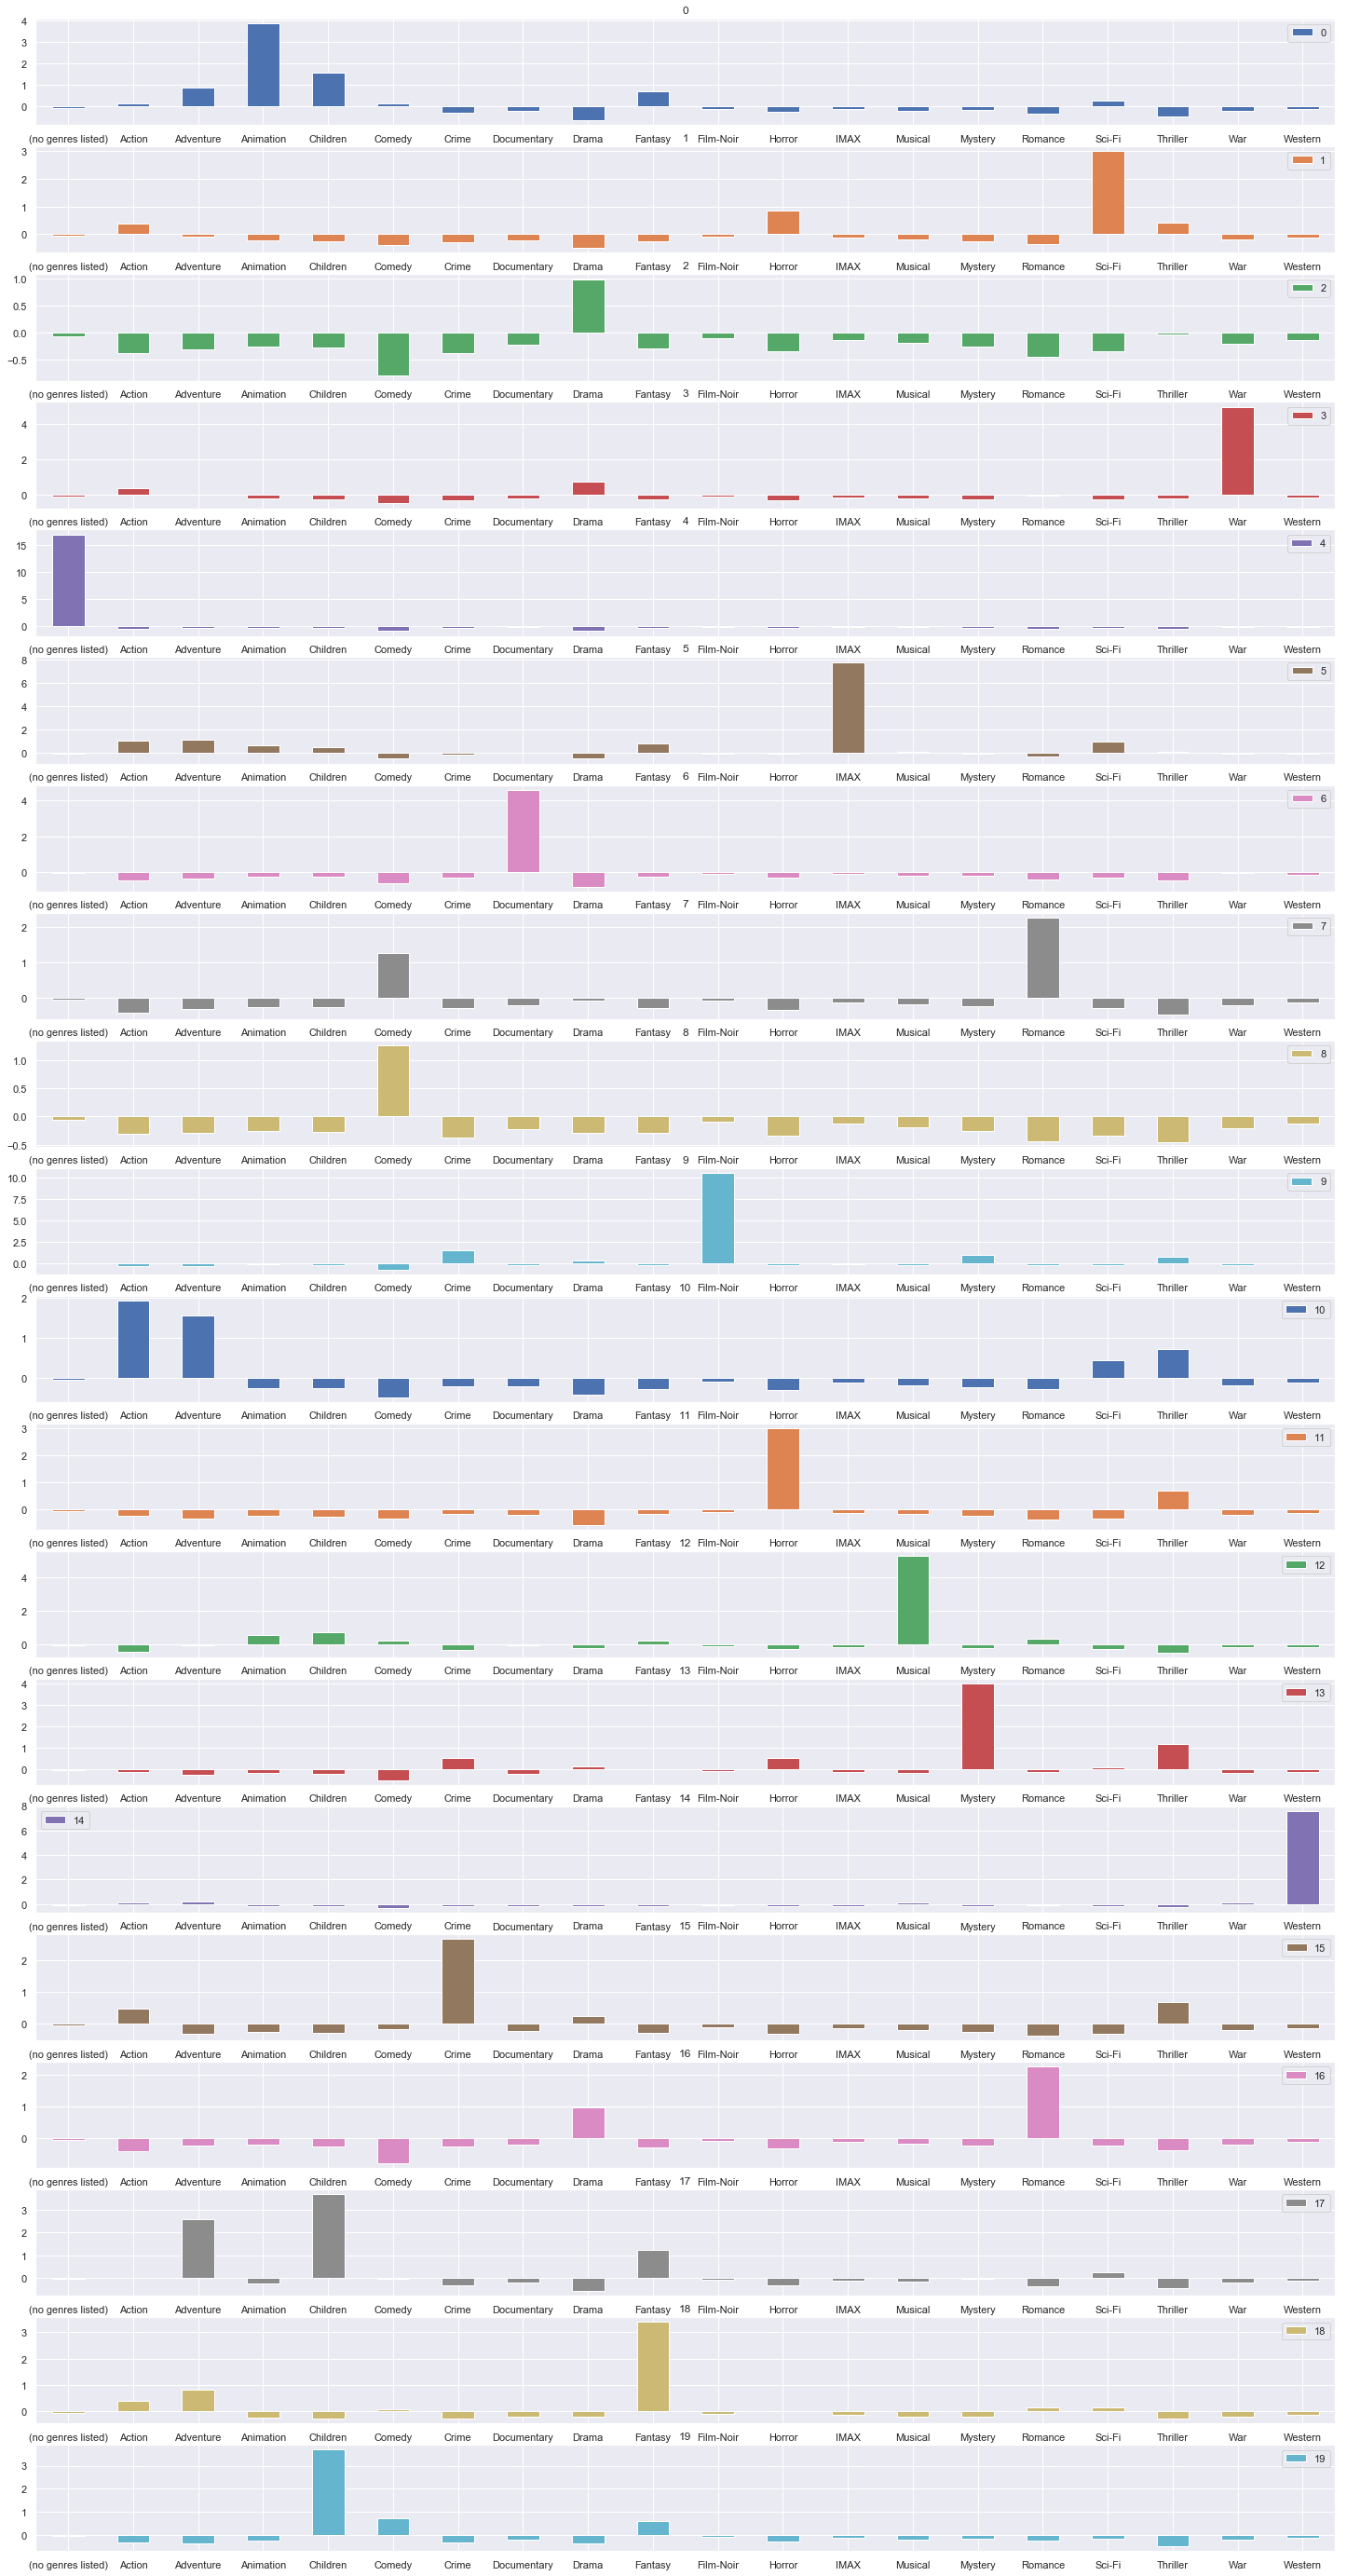

In [22]:
grupos.T.plot.bar(subplots=True,figsize=(25,50),sharex=False,grid=True,rot=0)

In [23]:
grupo = 2
filtro = modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
2521,3374,Daughters of the Dust (1991),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6008,37736,Oliver Twist (2005),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2607,3484,"Skulls, The (2000)",Thriller,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3982,5615,Invincible (2001),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2811,3756,"Golden Bowl, The (2000)",Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3679,5068,Beijing Bicycle (Shiqi sui de dan che) (2001),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9301,158966,Captain Fantastic (2016),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7429,80839,Secretariat (2010),Adventure|Drama,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6023,38388,Goal! The Dream Begins (Goal!) (2005),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5957,34482,"Browning Version, The (1951)",Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
def kmeans(numero_de_clusters, generos):
    modelo = KMeans(n_clusters=numero_de_clusters)
    modelo.fit(generos)
    return [numero_de_clusters,modelo.inertia_]#modelo.inertia_ retorna o erro quadrático médio

kmeans(20,generos_escalados)

[20, 54455.959911590435]

In [25]:
kmeans(3,generos_escalados)

[3, 166142.655452159]

In [26]:
resultado = [kmeans(numero_de_grupos, generos_escalados) for numero_de_grupos in range(1,41)]
resultado

[[1, 194840.0],
 [2, 179665.64453856135],
 [3, 166099.38884974745],
 [4, 157078.61811362312],
 [5, 145971.47461818752],
 [6, 137884.45169897738],
 [7, 128979.82749688839],
 [8, 118595.17267563514],
 [9, 111275.00338226318],
 [10, 102375.05648925177],
 [11, 93121.22183162329],
 [12, 87200.97713447268],
 [13, 80333.10744557914],
 [14, 74105.31147323539],
 [15, 68034.94305790534],
 [16, 65305.756885135925],
 [17, 60609.96592237217],
 [18, 58890.75259384157],
 [19, 57965.69633377414],
 [20, 55558.27613902587],
 [21, 54454.56796992528],
 [22, 51476.08747326443],
 [23, 50017.169869010795],
 [24, 49447.259025312],
 [25, 47393.661153926514],
 [26, 46297.24308108872],
 [27, 45705.82488139774],
 [28, 45295.51816451791],
 [29, 43686.07187146188],
 [30, 42350.20125537967],
 [31, 41914.1177985069],
 [32, 40869.829022860395],
 [33, 40445.10340718623],
 [34, 39636.157998302886],
 [35, 37788.73614352631],
 [36, 37914.54348923931],
 [37, 37303.96757546963],
 [38, 36542.06547686174],
 [39, 35717.7560285

In [27]:
resultado = pd.DataFrame(resultado,columns=["grupos","inertia"])
resultado

,grupos,inertia
0,1,194840.000000
1,2,179665.644539
2,3,166099.388850
3,4,157078.618114
4,5,145971.474618
5,6,137884.451699
6,7,128979.827497
7,8,118595.172676
8,9,111275.003382
9,10,102375.056489


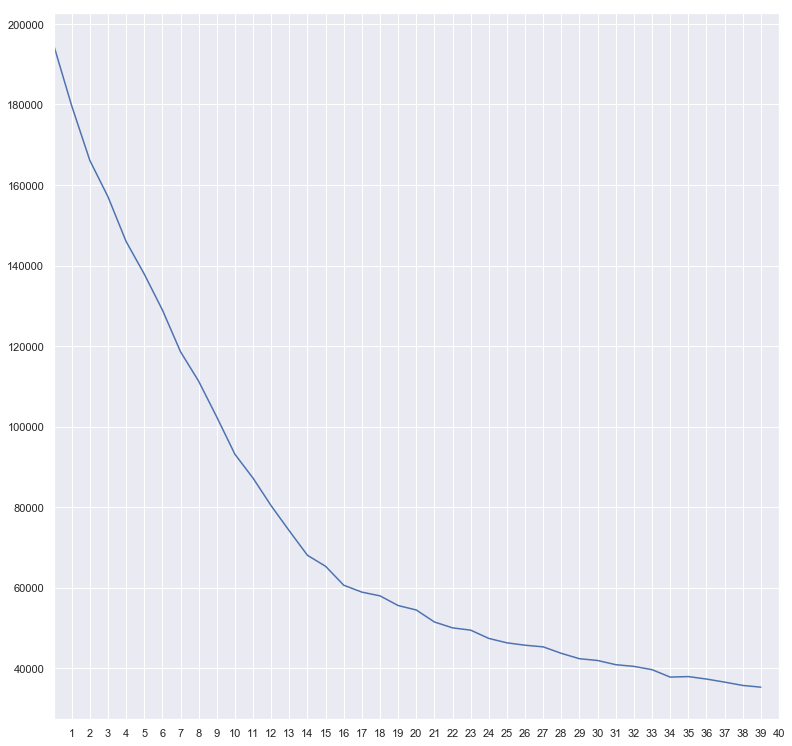

In [28]:
resultado["inertia"].plot(xticks=resultado.grupos)

Esse gráfico que geramos é uma técnica conhecida como "elbow method", ou "método do cotovelo" em tradução livre. Se você reparar bem, a curva do gráfico é decrescente de maneira regular, até que ela tem um momento de quebra e, então, continua caindo. O elbow method diz que o número de clusters que devemos escolher, e que irá otimizar o número de grupos, é justamente o ponto dessa quebra (ou "elbow point") - que, no nosso caso é 17.

Verificando nossos dados, perceberemos que, com 17 centroides, o erro é de cerca de 60.000. Vamos instanciar um modelo do KMeans(), passando 17 como número de clusters. Em seguida, treinaremos o modelo (modelo.fit()) com os generos_escalados.

In [29]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=17, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F8EB2BF390>,
      dtype=object)

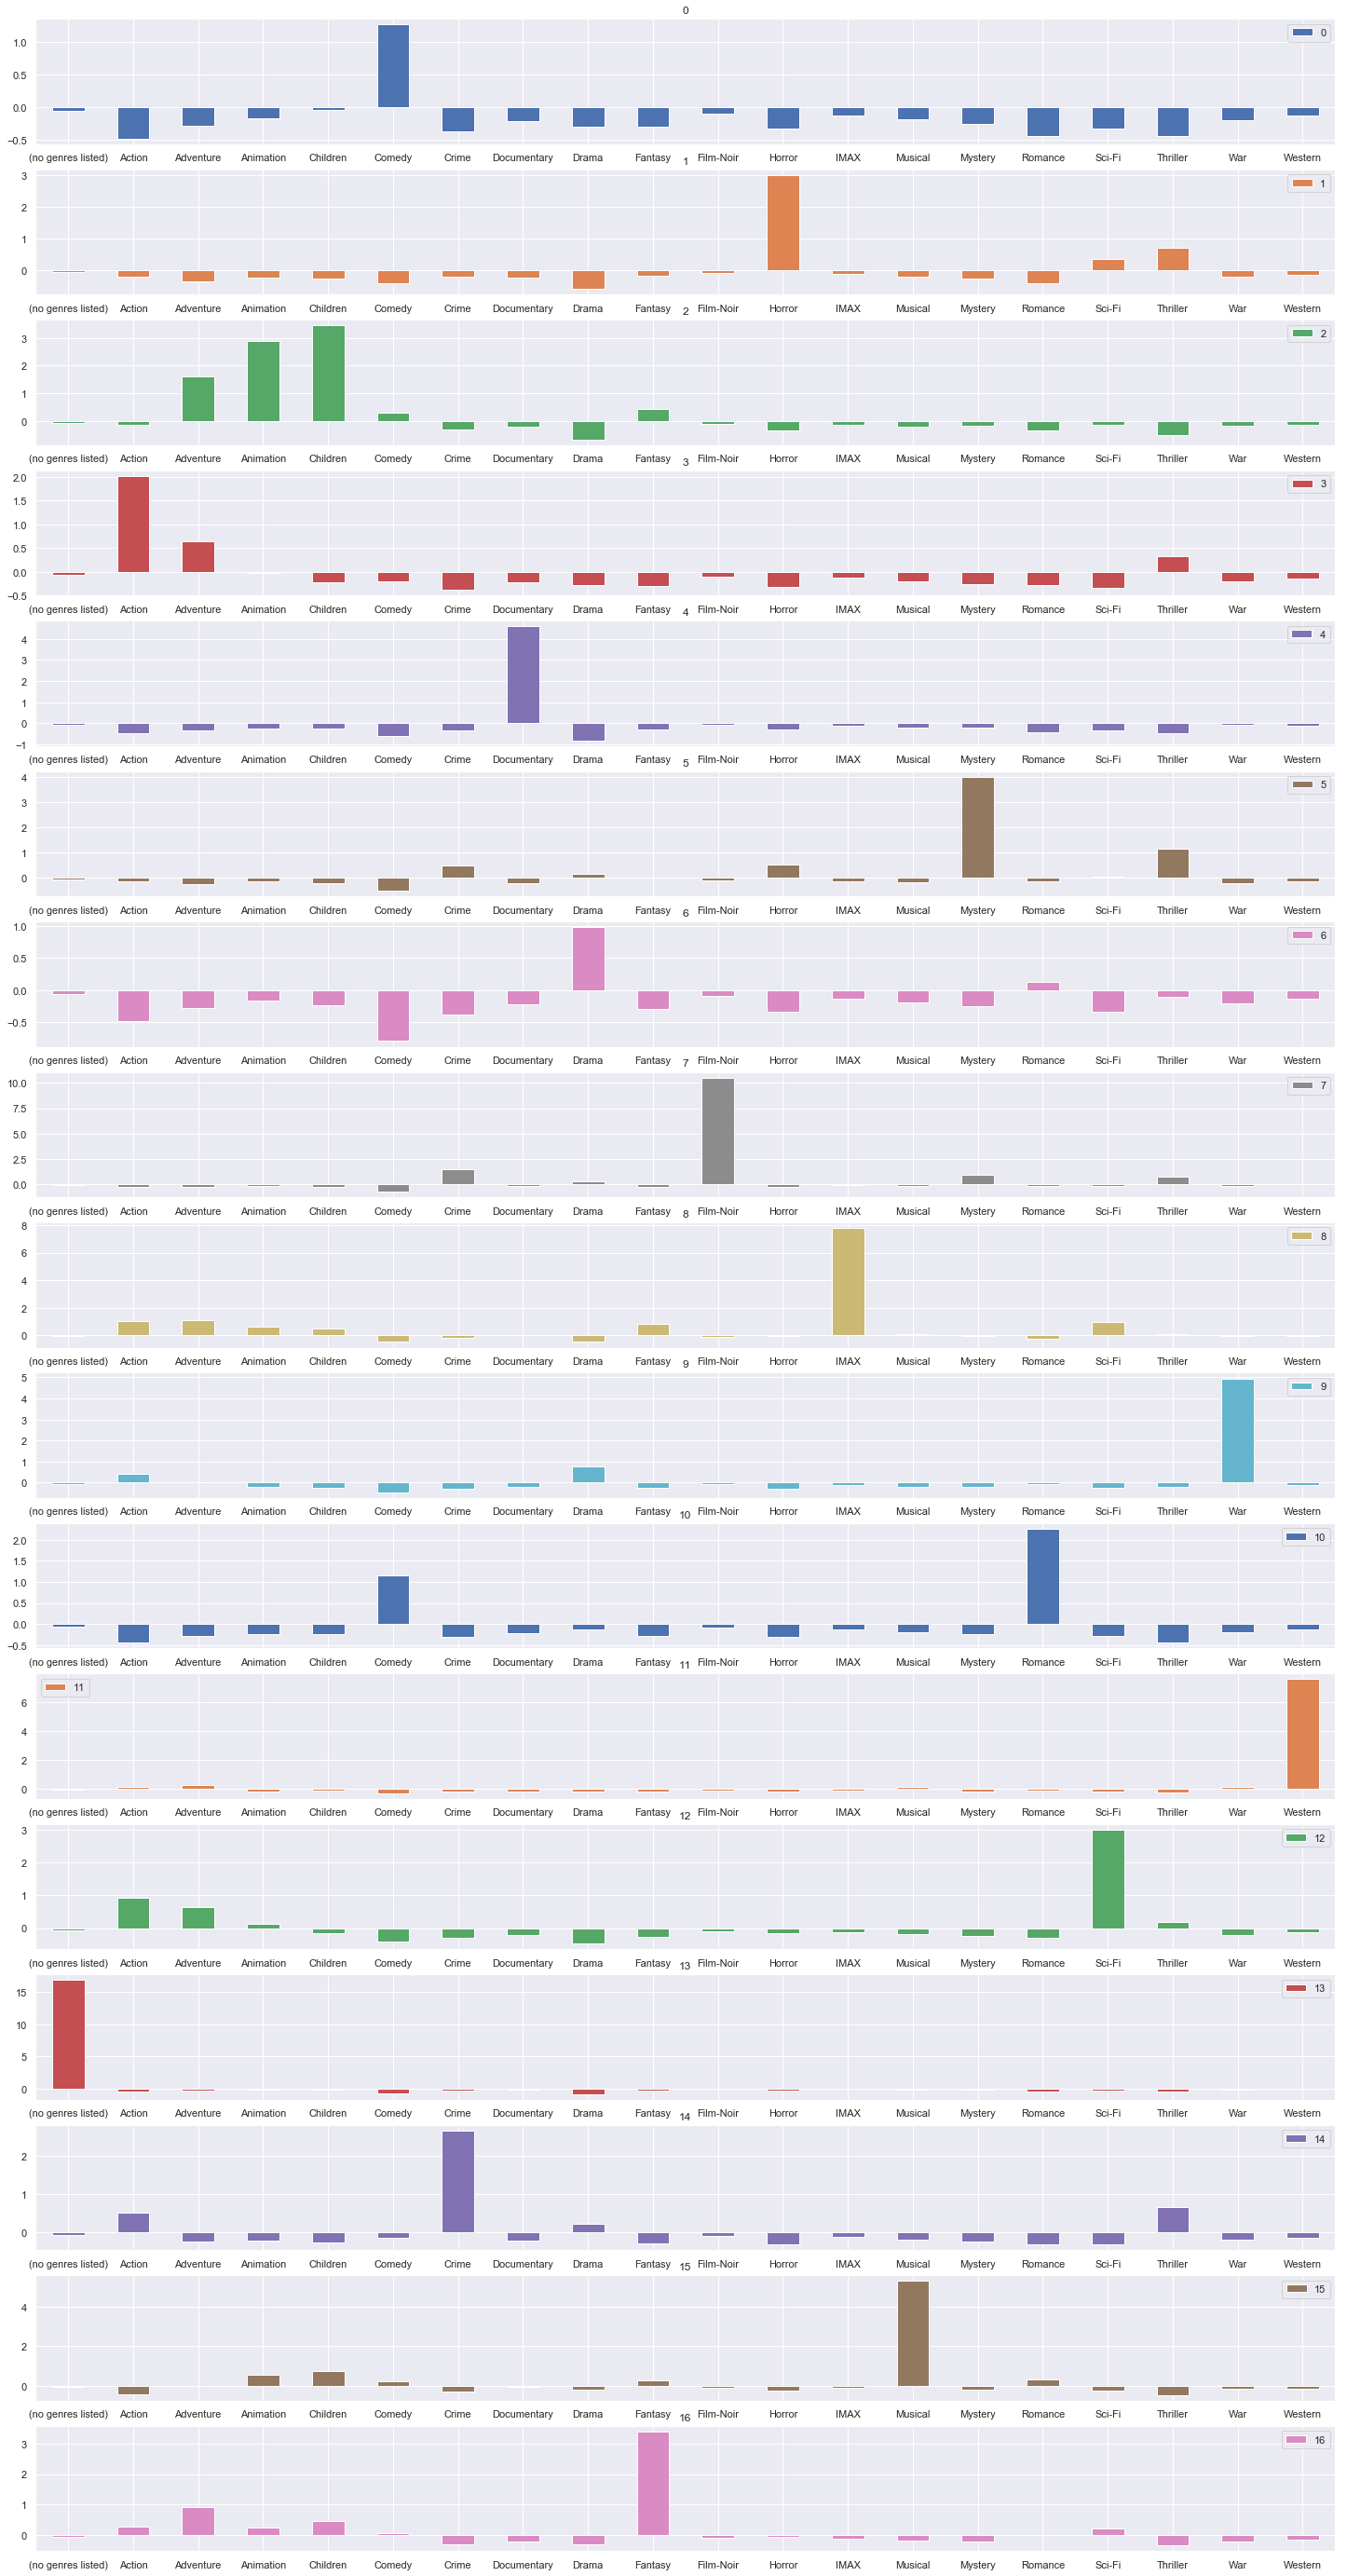

In [30]:
grupos = pd.DataFrame(modelo.cluster_centers_,columns=generos.columns)
grupos.T.plot.bar(subplots=True,figsize=(25,50),sharex=False,grid=True,rot=0)

In [31]:
grupo = 15
filtro = modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
4183,6030,Girls! Girls! Girls! (1962),Comedy|Musical,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
6804,60803,"Little Drummer Boy, The (1968)",Animation|Children|Musical,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4278,6245,Sweet Charity (1969),Comedy|Drama|Musical|Romance,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
921,1220,"Blues Brothers, The (1980)",Action|Comedy|Musical,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
7207,72737,"Princess and the Frog, The (2009)",Animation|Children|Fantasy|Musical|Romance,0,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
3494,4775,Glitter (2001),Drama|Musical|Romance,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1273,1688,Anastasia (1997),Adventure|Animation|Children|Drama|Musical,0,0,1,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
534,631,All Dogs Go to Heaven 2 (1996),Adventure|Animation|Children|Fantasy|Musical|R...,0,0,1,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
8303,106696,Frozen (2013),Adventure|Animation|Comedy|Fantasy|Musical|Rom...,0,0,1,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
3729,5168,Royal Wedding (1951),Comedy|Musical|Romance,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
